---
format: 
    html:
        embed-resources: true
---

# Lab: Numerical optimization and Univariate Linear Regression

*Author:* J. Hickman

**Instructions** 

* Read and work through all tutorial content and do all exercises below
  
**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

## Overview 

* In this lab, we will code the gradient-descent algorithm for numerical, gradient-based optimization.  
* This algorithm is *extremely important*; it is the cornerstone of all modern neural network training (from an MLP trained on MNIST to GPT-4).  
* If you are interested in deep learning, or optimization more broadly, then understanding this algorithm is essential.  
* Training a supervised parametric regression model is essentially the multi-variable optimization of a scalar field (vector input, scalar output), known as the loss function:  
  $$L = L(\mathbf{w}) = L(w_0, w_1, w_2, \dots, w_N).$$  
* We will use $\mathbf{w}$ as the independent variable because the inputs to the loss function are the model parameters, often called weights ($\mathbf{w}$) of the model.  
* The goal of optimization is to find the special point $\mathbf w^*$ where there is a local (or global) minima (or maxima), this point $\mathbf w^*$ means that $L(\mathbf w^*)$ is stationary, meaning that the following condition is satisfied $\mathbf{\nabla} L(\mathbf{w}^*) = 0$ at $\mathbf{w}^*$, where:  
  $$\mathbf{\nabla} L(\mathbf{w^*}) = \left(\frac{\partial L}{\partial w_0}, \frac{\partial L}{\partial w_1}, \dots, \frac{\partial L}{\partial w_N}\right)|_{w=w^*}$$  
  is the gradient, i.e., the vector of partial derivatives.  
* **IMPORTANT:** In this lab, we won’t focus on training a model; instead, we will concentrate on minimizing simple mathematical functions.  
* The most common form of numerical optimizers are "gradient-based" methods.  
* These methods "follow" the gradient, i.e., the vector of partial derivatives, downhill to local minima in the optimization space.  
* In this lab, we will explore fundamental concepts related to numerical optimization, including numerical derivatives, solvers, and optimizers.




# Part-1: Optimization

## Demonstration: Sci-py optimizer (1D)

We've seen the Sci-py minimizer already, but as a refresher lets take another quick look.

In [579]:
### Import packages 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from   scipy.optimize import minimize

### Define our objective function:
 
* i.e the function we want to optimize
* We will call it L because in regression this will be our loss function
* We will use "w" as the dependent variable because the inputs to the loss functions of the model parameters, often called weights (w) of the model

In [580]:
# Define our objective function: use a simple 1D quadratic function
def L1(w_i):
	# OUTPUT
	out=(w_i-10)**2.0+5
	return out

### Visualize the objective function

Here we plot the objective function at the initial guess near the minimum.

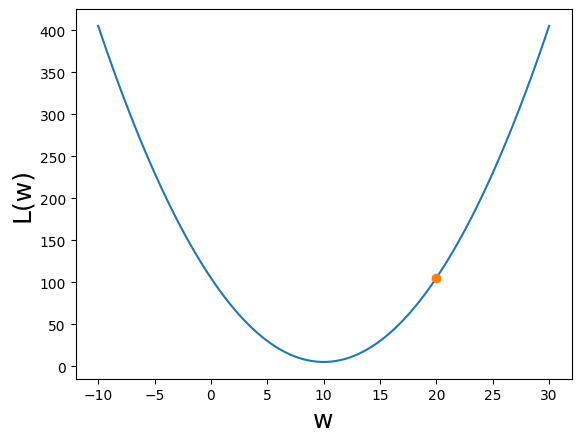

In [581]:
# PLOTTING FUNCTION (L is a function handle)
# PLOT THE FUNCTION IN THE NEIGHBORHOOD OF w_o
def plotter(w_o):
    # N=1000; wmin=w_o-3*w_o; wmax=w_o+3*w_o
    N=100; wmin=-10; wmax=30

    W = np.linspace(wmin,wmax,N)
    plt.figure() #INITIALIZE FIGURE 
    FS=18   #FONT SIZE
    plt.xlabel('w', fontsize=FS)
    plt.ylabel('L(w)', fontsize=FS)
    plt.plot(W,L1(W),'-')
    plt.plot(w_o,L1(w_o),'o')

#INITIAL GUESS FOR w VALUE OF MINIMUM
w_0=20

# EVALUATION
plotter(w_0)

FINAL GUESS: w_opt = [9.99999998]  L(w_opt) = [5.]


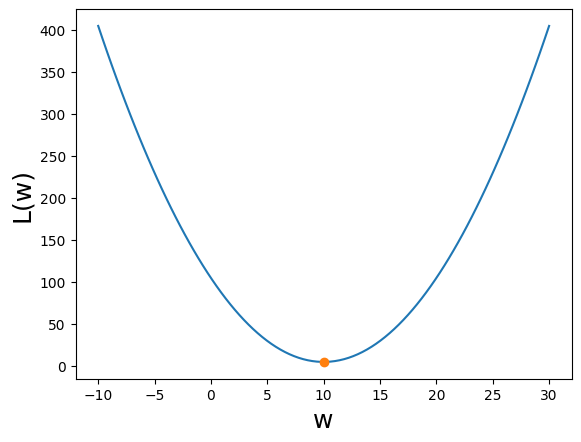

In [582]:
# RUN THE SCIPY MINIMIZER
res = minimize(L1, w_0, method='BFGS', tol=1e-15)
w_opt=res.x
print("FINAL GUESS: w_opt =",w_opt, " L(w_opt) =",L1(w_opt))
plotter(w_opt)

## Derivatives

* Recall that the goal of differentiation is to find the slope of $f(x) at a given point $x_o$

* This idea is summarized in the following image

![](images/2023-01-22-19-58-39.png)

## Numerical derivatives

Given a function $y=f(x)$, we can compute a derivative, denoted $f'(x)$, with respect to it's independent variable $x$.

The derivative has the meaning of the instantaneous slope of the function at any point point $x$,  i.e. the slope of the tangent line. 

We can approximate the tangent line, via the secant line, using any two points on the curve. 

The closer the points are, i.e. the smaller $\Delta x$, the better the approximation.

This idea is summarized in the following image

![](images/2023-01-22-18-23-14.png)

Using our $L$ and $w$ notation from before, we can write the central difference as the following:

$$\frac{dL}{dw} \approx \frac{L(w+\Delta w)-L(w-\Delta w)}{2\Delta w}$$

Notice how easy this is, differentiation reduces to a simple function evaluation and subtraction.


## Demo: Understanding Gradient descent 

* Here we will code Gradient descent for a function of a single variable
* As we saw in the lecture, it is a remarkably simple algorithm 
* It has only one hyper-parameter $\alpha$ (known as the learning rate)
$$w_{i+1}=w_{i}-\alpha \frac{dL}{dw}$$
* Clearly we need the derivative of the loss function  $L$ WRT to $w$ to apply the formula 
* We will approximate the derivative using the backwards finite difference formula 
  $$\frac{dL}{dw} \approx \frac {L(w)-L(w-\Delta w)}{\Delta w}$$
* Artificial Neural network training uses a more sophisticated method of gradient calculation, known as back-propagation. However the underlying fundamental concepts are the same. 



In [583]:
#PARAMETERS
LR=0.01								# LEARNING RATE (alpha)
imax=500							# MAX NUMBER OF STEPS
wi=20								# INITIAL GUESS
dw=0.0001							# STEP SIZE FOR FINITE DIFFERENCE CALCULATION
num_eval=0							# RESET COUNTER
tol=0.0001							# CONVERGENCE TOLERENCE

# OPTIMIZATION LOOP
i=0 	 
while(i<=imax):

	# EVALUATE OBJECTIVE FUNCTION
	Li=L1(wi)

	# COMPUTE GRADIENT (backwards difference)
	dL_dw=(Li-L1(wi-dw))/(dw)

	# APPLY GRADIENT DECENT STEP
	wip1=wi-LR*dL_dw  
	
	# REPORT 
	if(i%25==0):
		print("step =",i,"    wi =",round(wi,2),"    Li =",round(Li,2),
			  "   |w_ip1-w_i|=",round(np.absolute(wip1-wi),6)) 

	# STOPPING CRITERION 
	if(np.absolute(wip1-wi)<tol):
		print("STOPPING CRITERION MET (STOPPING TRAINING)")
		break

	# UPDATE
	wi=wip1
	i=i+1


step = 0     wi = 20     Li = 105.0    |w_ip1-w_i|= 0.199999
step = 25     wi = 16.03     Li = 41.42    |w_ip1-w_i|= 0.120692
step = 50     wi = 13.64     Li = 18.26    |w_ip1-w_i|= 0.072834
step = 75     wi = 12.2     Li = 9.83    |w_ip1-w_i|= 0.043952
step = 100     wi = 11.33     Li = 6.76    |w_ip1-w_i|= 0.026524
step = 125     wi = 10.8     Li = 5.64    |w_ip1-w_i|= 0.016006
step = 150     wi = 10.48     Li = 5.23    |w_ip1-w_i|= 0.009659
step = 175     wi = 10.29     Li = 5.08    |w_ip1-w_i|= 0.005829
step = 200     wi = 10.18     Li = 5.03    |w_ip1-w_i|= 0.003518
step = 225     wi = 10.11     Li = 5.01    |w_ip1-w_i|= 0.002123
step = 250     wi = 10.06     Li = 5.0    |w_ip1-w_i|= 0.001281
step = 275     wi = 10.04     Li = 5.0    |w_ip1-w_i|= 0.000773
step = 300     wi = 10.02     Li = 5.0    |w_ip1-w_i|= 0.000466
step = 325     wi = 10.01     Li = 5.0    |w_ip1-w_i|= 0.000282
step = 350     wi = 10.01     Li = 5.0    |w_ip1-w_i|= 0.00017
step = 375     wi = 10.01     Li = 5.0

## Assignment-1: Single variable secant method

* Copy the gradient descent code as a starting point
  
* Update the first derivative finite difference approximation from the backwards formula to the central formula (which is more accurate)
$$L'(w_i)=\frac{d L}{dw}\approx\frac{L(w_i+dw)-L(w_i-dw)}{2 dw}$$
* Convert Gradient descent to Newton's method with the derivatives estimated via finite difference (i.e. the secant method)
$$w_{i+1}=w_{i}-\frac{L'(w_i)}{L''(w_i)}$$
* Approximate the second derivative as 
$$L''(w_i)=\frac{d^2 L}{dw^2}\approx\frac{L(w_i+dw)-2.0L(w_i)+L(w_i-dw)}{dw^2}$$
* Delete the stopping criterion code and only run for 10 steps.
* If coded correctly it should converge to the minima within the first couple steps

In [584]:
# USE THE FOLLOWING PARAMETERS 
# NOTICE HOW EVEN THOUGH WE START FURTHER AWAY, 
# THE SECANT METHOD IS MUCH MUCH MORE EFFICIENT AT FINDING THE MINIMUM 

#PARAMETERS
wi=200	  # INITIAL GUESS
imax=10
i=0 	 

# OPTIMIZATION LOOP
i=0 	 
while(i<=imax):
	# INSERT YOUR CODE HERE


step = 0     wi = 200     Li = 36105.0    |w_ip1-w_i|= 190.053866
step = 1     wi = 9.95     Li = 5.0    |w_ip1-w_i|= 0.053866
step = 2     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 3     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 4     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 5     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 6     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 7     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 8     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 9     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 10     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0


## Demonstration: Two dependent variables
* Now let's find the minimum using SciPy of a scalar field with two dependent variables. 
* i.e. find $(w_0,w_1)$ which minimize $L(w_0,w_1)$
* Where our objective function is:  
$$L(w_0,w_1)=4.343+(w_0-3.14)^2+(w_1-2.71)^2$$

We can easily read off the location of the minimum as $\mathbf{w}^*=(w^*_0,w^*_1)=(3.14,2.71)$ and the value of the objective function at the minimum as $L(\mathbf{w}^*)=4.343$.

In [585]:
# DEFINE FUNCTION
def L2(w_i):
    # (w0,w1) --> L TYPE OBJECTIVE FUNCTION
    return 4.343+(w_i[0]-3.14)**2.0+(w_i[1]-2.71)**2

# EXPECTED
print("EXPECTED ANSWER --> (w0,w1)=(3.14,2.71)  with L(3.14,2.71)=4.343")

# INITIAL GUESS 
w_0=np.array([0.1,0.1])
print("INITIAL GUESS: w_0 =",w_0)

# RUN MINIMIZER
res = minimize(L2, w_0, method='BFGS', tol=1e-15)

# PRINT RESULT
w_opt=res.x
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",L2(w_opt))

EXPECTED ANSWER --> (w0,w1)=(3.14,2.71)  with L(3.14,2.71)=4.343
INITIAL GUESS: w_0 = [0.1 0.1]
NUMERICAL SOLUTION: w_opt = [3.14 2.71]
 L(w_opt) = 4.343


## Assignment-2: Describe

Describe in your own words what is happening in the previous code cell.

`INSERT TEXT HERE`


## Assignment-3: Visualize objective 

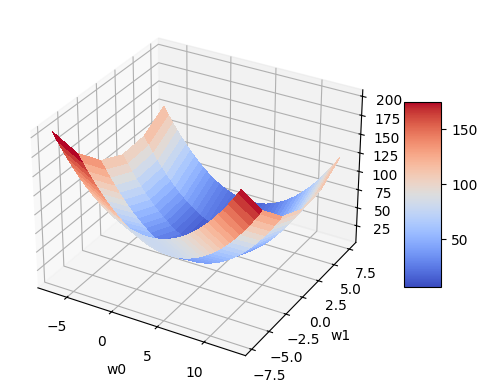

In [586]:
# INSERT CODE TO VISUALIZE THE TWO VARIABLE SCALAR FIELD AS A SURFACE PLOT

## Example: Four dependent variables

* Now let's find the minimum using SciPy of a scalar field with FOUR dependent variables. 
* i.e. find $(w_0,w_1,w_2,w_3)$ which minimize $L(w_0,w_1,w_2,w_3)$
* **Note:** There is no limit to the dimensionality, we could use the exact same procedure to minimize a scalar function of 501 variables $L(w_0,w_1, \dots, w_2,w_{500})$, it would just be slower 

In [587]:
# DEFINE FUNCTION
def L4(w_i):
    # (w0,w1,w2,w3) --> L TYPE OBJECTIVE FUNCTION
    return 8.343+(w_i[0]-3)**2.0+(w_i[1]-4)**2+(w_i[2]-10)**2+(w_i[3]-(-5))**2

# EXPECTED
print("EXPECTED ANSWER --> (w0,w1,w2,w3)=(3,4,10,-5)  with L((3,4,10,-5))=8.343")

# INITIAL GUESS 
w_0=np.array([0.1,0.1,0.1,0.1])
print("INITIAL GUESS: w_0 =",w_0)

# RUN MINIMIZER
res = minimize(L4, w_0, method='BFGS', tol=1e-15)

# PRINT RESULT
w_opt=res.x
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",L4(w_opt))

EXPECTED ANSWER --> (w0,w1,w2,w3)=(3,4,10,-5)  with L((3,4,10,-5))=8.343
INITIAL GUESS: w_0 = [0.1 0.1 0.1 0.1]
NUMERICAL SOLUTION: w_opt = [ 2.99999999  3.99999998 10.         -5.        ]
 L(w_opt) = 8.343


# Assignment-4: Multi-variable gradient decent

**INSTRUCTIONS**

* Even to do the simplest possible regression, we need a multi-variable optimizer.
* In a function call `my_minimizer`
* Generalize the single variable gradient descent algorithm to the case of multiple variables 
* In this case the parameter $w_i$ becomes a vector $\mathbf w_i$ (i.e. a numpy array)
* This is also the case for the derivative, which becomes the gradient (another numpy array)
$$\mathbf \nabla L = \left(\frac{\partial L}{\partial w_0},\frac{\partial L}{\partial w_1} \dots \frac{\partial L}{\partial w_N}\right)$$
* Each term in the gradient can be calculated by keeping all variables constant, except one, and applying the finite difference formula. 
* For example, consider just two variables, and computing $\frac{\partial L}{\partial w_0}$
  * $\mathbf w_i=(w_{i,0},w_{i,1})$
  * The perturbation for $w_0$ is $\mathbf \Delta w_0=(\Delta w,0)$ and $\mathbf \Delta w_1=(0,\Delta w)$ for $w_1$
  * the component of the gradient would be $\frac{\partial L}{\partial w_0}\approx \frac{L(\mathbf w_i+\mathbf \Delta w_0)-L(\mathbf w_i-\mathbf \Delta w_0)}{2\Delta w}$
  * where $\Delta w$ is a small number (hyper-parameter)
* Your code should be fully general and work for a $\mathbf w$ of arbitrary dimension

In [588]:
def my_minimizer(l,wi):
	#PARAM
	dw=0.0001							#STEP SIZE FOR FINITE DIFFERENCE
	LR=0.001							#LEARNING RATE
	i=0 	 							#INITIAL ITERATION COUNTER
	imax=100000							#MAX NUMBER OF ITERATION
	tol=10**-15							#EXIT AFTER CHANGE IN F IS LESS THAN THIS 
	NDIM=wi.shape[0]


	#INSERT YOUR CODE HERE

	return wi

## Test-1

* Apply your code to the L2 objective function, your solutions should match those found with SciPy
  
* **Note:** This is just a name (loss function with 2 variables), it has nothing to do with L2 regularization which we will discuss later in the course.

In [589]:
# INITIAL GUESS 
w_0=np.array([0.1,0.1])
print("INITIAL GUESS: w_0 =",w_0)

print("EXPECTED ANSWER --> (w0,w1)=(3.14,2.71)  with L(3.14,2.71)=4.343")

# RUN MINIMIZER
w_opt = my_minimizer(L2, w_0)

# PRINT RESULT
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",L2(w_opt))

INITIAL GUESS: w_0 = [0.1 0.1]
EXPECTED ANSWER --> (w0,w1)=(3.14,2.71)  with L(3.14,2.71)=4.343
STOPPING CRITERION MET (STOPPING TRAINING)
NUMERICAL SOLUTION: w_opt = [3.14 2.71]
 L(w_opt) = 4.343


## Test-2

* Apply your code to the L4 objective function, your solutions should match those found with SciPy

In [590]:
# INITIAL GUESS 
w_0=np.array([0.1,0.1,0.1,0.1])
print("INITIAL GUESS: w_0 =",w_0)

print("EXPECTED ANSWER --> (w0,w1,w2,w3)=(3,4,10,-5)  with L((3,4,10,-5))=8.343")

# RUN MINIMIZER
w_opt = my_minimizer(L4, w_0)

# PRINT RESULT
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",L4(w_opt))

INITIAL GUESS: w_0 = [0.1 0.1 0.1 0.1]
EXPECTED ANSWER --> (w0,w1,w2,w3)=(3,4,10,-5)  with L((3,4,10,-5))=8.343
STOPPING CRITERION MET (STOPPING TRAINING)
NUMERICAL SOLUTION: w_opt = [ 3.  4. 10. -5.]
 L(w_opt) = 8.343


# Part-2: Univariate Linear Regression

Now let's use our optimization code to fit (train) a univariate linear regression model to the following data:

## Generate some toy-data

Let's use a simple "ground truth" model to generate some data:

$$y_{data}=1+2x$$

We will model this function using a linear model of the following form:

$$y_{prediction}=y_{pred}=M(x,\mathbf{w})=w_0+w_1x$$

In this case our data generating function is intentionally and conveniently the same functional form as our model.

So we know that the "optimal" parameters are $w^*_0=1$ and $w^*_1=2$

Sometimes this will instead be written with beta notation

$$\beta_0+\beta_1x$$    

In [591]:
## Generate some data

x=np.linspace(0,10,100)
y=2*x+1+np.random.randn(100)*0.75

# get a 20% list of randome indices for our test data
test_indices=np.random.choice(100,size=20,replace=False)

# get the rest for our training data
train_indices=np.setdiff1d(np.arange(100),test_indices)

x_train=x[train_indices]
y_train=y[train_indices]
x_test=x[test_indices]
y_test=y[test_indices]


### Define a model function

In [592]:
def model(x,w): 
    #INSERT YOUR CODE HERE

### Utility function to plot the data

In [593]:
def plot_data(x,y,x_test,y_test,w):
    plt.plot(x_train,y_train,'.')
    plt.plot(x_test,y_test,'.')
    plt.plot(x,model(x,w),'-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Training data','Test data','Model'])
    plt.show()

### Plot with ground truth parameters`

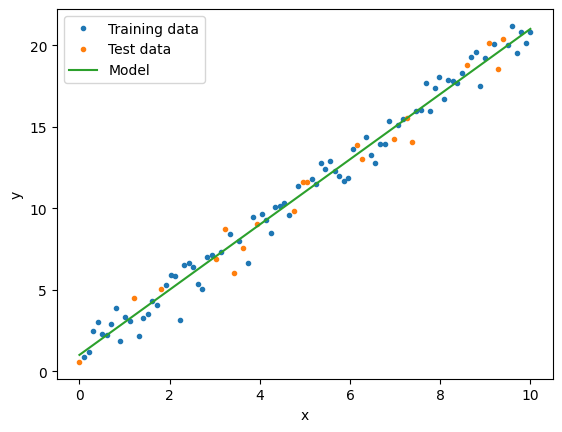

In [594]:
plot_data(x,y,x_test,y_test,w=(1,2))

## Plot with a random initial

Notice how our initial guess is not very good

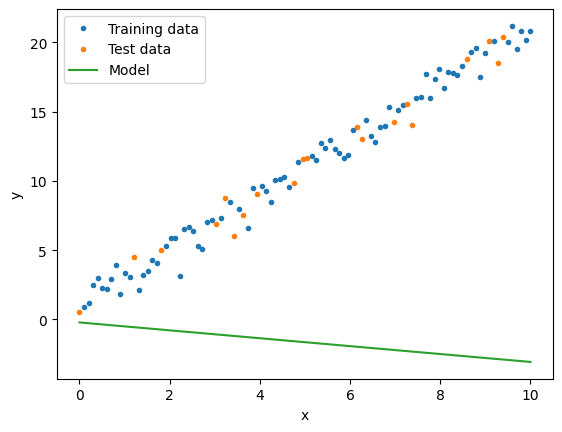

In [595]:
# set seed to make the noise deterministic/reproducible
np.random.seed(121)

# initial guess for the parameters
w_0=np.random.randn(2)
plot_data(x,y,x_test,y_test,w_0)

### Training the model

To train we need a loss function, since we are doing regression we will use the mean squared error:

$$L(w)=\frac{1}{N}\sum_{i=1}^N(y_{data,i}-y_{prediction,i})^2$$

This is the key concept for MOST of parametric machine learning:  By minimizing this loss function we can find the optimal parameters $w^*$ that fit our data.

Notice how we are using the training data to compute the loss function. This is the data "seen" by the optimizer, hence the name training data.

In [596]:
def loss(w):
    #INSERT YOUR CODE HERE

## Case-1: Minimize the loss function using SciPy

First we will use the `minimize` function from SciPy to minimize the loss function.

Here we are using the notation $\mathbf{w}^*=\mathbf{w}_{opt}$ to represent the parameters of the model.

In [597]:
# INITIAL GUESS 
print("INITIAL GUESS: w_0 =",w_0)

# RUN MINIMIZER
res = minimize(loss, w_0, method='BFGS', tol=1e-15)

# PRINT RESULT
w_opt=res.x
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",loss(w_opt))

INITIAL GUESS: w_0 = [-0.21203317 -0.28492917]
NUMERICAL SOLUTION: w_opt = [0.98827575 2.00953188]
 L(w_opt) = 0.5738559639797195


Recall that the "ground truth" parameters are $w^*_0=1$ and $w^*_1=2$

Our numerical solution is close, but not exact. This is due to the noise in the data. If we made the noise smaller, our solution would be closer to these "ground truth" parameters. 

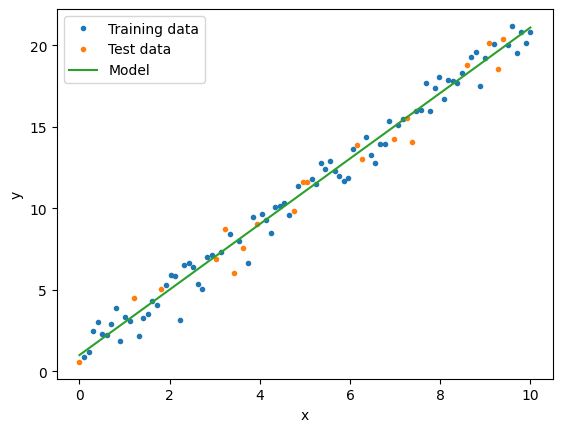

In [598]:
plot_data(x,y,x_test,y_test,w=w_opt)

## Case-2: Minimize the loss function using our gradient descent code

Now lets re-train again but this time using our gradient descent code.

In [599]:
# RUN MINIMIZER
w_opt = my_minimizer(loss, w_0)

# PRINT RESULT
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",loss(w_opt))


STOPPING CRITERION MET (STOPPING TRAINING)
NUMERICAL SOLUTION: w_opt = [0.98827565 2.0095319 ]
 L(w_opt) = 0.573855963979715


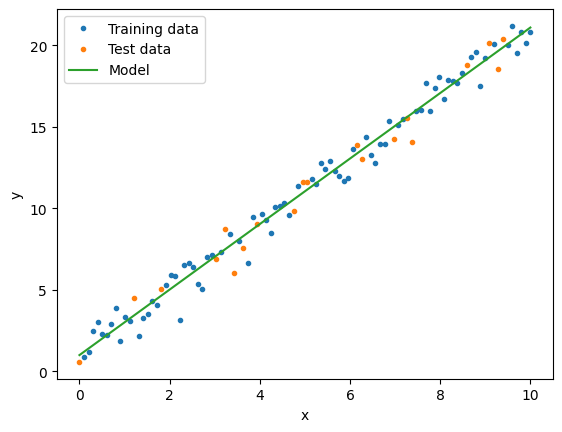

In [600]:
plot_data(x,y,x_test,y_test,w=w_opt)

## Visualize the regression results

A parity plot is a plot of the predicted values vs the true values.

This is a simple way to visualize the performance of a regression model.

Where the line $y_{pred}=y_{data}$ is the identity line and represents the case where the model perfectly predicts the true values.

### Assignment-5: Plot the parity plot

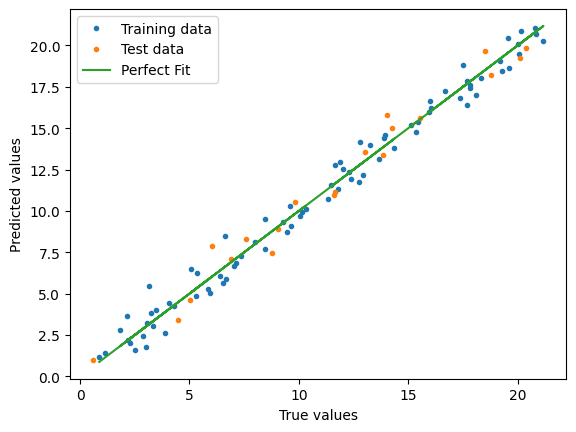

In [601]:
# INSERT CODE TO PLOT THE PARITY PLOT FOR THE TRAINING AND TEST DATA

## Report on the results

The most important metrics for linear regression are the mean squared error (MSE) and the R-squared value.

MSE is the mean squared error between the predicted and true values.

R-squared is the coefficient of determination, which measures the proportion of variance in the dependent variable that is explained by the independent variable.

The R-Square values is related to the Pearson correlation coefficient squared between the predicted and true values.

**Note**: If you reduce the noise to zero, then you can achieve a perfect fit and the R-squared value will approach 1.

Lets compute the Pearson correlation coefficient for the training data shown in the parity plot

This visualizes the extent of the correlation between the predicted and true values.

### Assignment-6: 

Compute the Pearson correlation coefficient from scratch

In [602]:
# INSERT CODE TO COMPUTE THE PEARSON CORRELATION COEFFICIENT FROM SCRATCH USING THE DEFINITION/FORMULA (WITHOUT np.corrcoef)


Pearson correlation coefficient of predicted vs true values for the training data: r_train = 0.9920095176720589
Pearson correlation coefficient squared of predicted vs true values for the training data: r_train^2 = 0.9840828831519509


Lets double check our result using numpy

In [603]:
# COMPARISON: compute the Pearson correlation coefficient using numpy
r_train=np.corrcoef(y_train,model(x_train,w_opt))[0,1]
print("Pearson correlation coefficient of predicted vs true values for the training data: r_train =",r_train)
print("Pearson correlation coefficient squared of predicted vs true values for the training data: r_train^2 =",r_train**2)

Pearson correlation coefficient of predicted vs true values for the training data: r_train = 0.9920095176720591
Pearson correlation coefficient squared of predicted vs true values for the training data: r_train^2 = 0.9840828831519514


Lets do one more sanity check using sklearn, notice how all the numbers should match up

In [604]:
import sklearn.metrics as metrics

# compute the R-squared value
r2_train=metrics.r2_score(y_train,model(x_train,w_opt))
print("R-squared value of predicted vs true values for the training data: r2_train =",r2_train)

# compute the R-squared value for the test data
r2_test=metrics.r2_score(y_test,model(x_test,w_opt))    
print("R-squared value of predicted vs true values for the test data: r2_test =",r2_test)

R-squared value of predicted vs true values for the training data: r2_train = 0.9840828831519515
R-squared value of predicted vs true values for the test data: r2_test = 0.9744424993687157


# Case-3: Statsmodels 

Lets do the regression one more time using Statsmodels.

Statsmodels is a Python library for statistical modeling and analysis. It provides a wide range of tools for statistical modeling, including linear regression, time series analysis, and more.

Statsmodels is built on top of NumPy and SciPy, and it provides a comprehensive set of functions for statistical analysis.

Statsmodels is a powerful tool for statistical modeling and analysis, and it is widely used in the field of statistics and data science.

In [605]:
print(x_train.shape,y_train.shape)

(80,) (80,)


(80,) (80,)
(80, 1) (80, 1)
(80, 2) (80, 1)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     4822.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           6.77e-72
Time:                        16:58:29   Log-Likelihood:                -91.300
No. Observations:                  80   AIC:                             186.6
Df Residuals:                      78   BIC:                             191.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1      

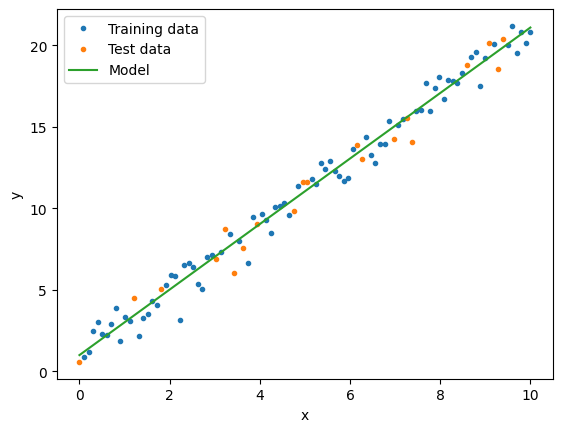

In [606]:
# RUN THE FOLLOWING CODE 

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

print(x_train.shape,y_train.shape)

# reshape the data
x_train=np.reshape(x_train,(-1,1))
y_train=np.reshape(y_train,(-1,1))

print(x_train.shape,y_train.shape)

# ADD CONSTANT TERM
x_train_tmp=np.concatenate((x_train,np.ones((x_train.shape[0],1))),axis=1)
print(x_train_tmp.shape,y_train.shape)

# FIT AND SUMMARIZE OLS MODEL
mod = sm.OLS(y_train,x_train_tmp)
res = mod.fit()
print(res.summary())
print("STATSMODELS SOLUTION: Optimal parameters: w_opt =",res.params[1],res.params[0])
print("NUMERICAL SOLUTION FROM OUR OPTIMIZATION CODE: w_opt = [0.98827565 2.0095319 ]")
plot_data(x,y,x_test,y_test,w=(res.params[1],res.params[0]))

**Note**: If everything went well, you should see that the results (parameters, predictions, and R-squared values) from Statsmodels are basically identical, up to numerical precision, to the results from SciPy, and from our gradient descent code.


### Assignment-7: Discussion 

List two questions you have about the material covered in this lab, i.e highly points that you are unsure about.

1. 
2. 